In [63]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import random
import json

In [64]:
# ------------------------------------- ETAPA 0 (armazenando em listas)
def armazenar_em_lista(data_list):
  # Armazena as alturas, peso, idades e nomes de todos os jogadores
  lista_alturas = [] #0
  lista_pesos = [] #1
  lista_idades = [] #2
  lista_nomes = [] #3

  for i in data_list:
    for key, value in i.items():
      if key == 'ALTURA':
        lista_alturas.append(value)
      elif key == 'PESO':
        lista_pesos.append(value)
      elif key == 'IDADE':
        lista_idades.append(value)
      elif key == 'NOME':
        lista_nomes.append(value)
  return lista_alturas, lista_pesos, lista_idades, lista_nomes

# Retorna o imc como resultado
def calc_imc(m, h):
    imc = m / h**2

    # até 4 casas decimais
    imc = round(imc, 4)

    return imc

# Recebe a lista sequencial de todos os imc's dos jogadores
# Retorna o imc como resultado
def calc_imc_medio(lista_imcs):
    y = sum(lista_imcs) / len(lista_imcs)
    return y

def calc_imc_max(lista_imcs):
    y_max = max(lista_imcs)
    return y_max

# Recebe a média do IMC de todos os jogadores
# Retorna a média do IMC subtraido ao valor máximo de imc 
# aceitavel dividido pelo proprio valor maximo
def delta_imc_medio(y, y_max):
    delta_y = abs(y_max - y) / y_max
    return delta_y

In [65]:
# parâmetro: lista de alturas, lista de imcs
def calc_tmb(h, imc):
  idade = 25
  # equação proveniente do 'artigo 1' enviado pelo professor
  tmb = -0.1631 - 0.00255 * idade + 0.4721 * np.log(h*imc) + 0.2952 * np.log(h)
  tmb = round(tmb,4)
  return tmb

In [80]:
posicao = "DEFENSOR"
f = open("/content/defensores.json")
data_list = json.load(f)

# Armazena em uma lista todos os atributos dos jogadores
# listas = [[alturas], [pesos], [idades], [nomes]]
listas = armazenar_em_lista(data_list)
lista_alturas = listas[0]
lista_pesos = listas[1]
lista_idades = listas[2]
lista_nomes = listas[3]

imcs = []
imcs_g = []

time = []
for i in range(len(data_list)):
    imc_atual = calc_imc(lista_pesos[i], lista_alturas[i])
    nomes_e_dados = [lista_nomes[i]] 
    nomes_e_dados.append(lista_alturas[i])
    nomes_e_dados.append(lista_pesos[i])
    nomes_e_dados.append(lista_idades[i])
    nomes_e_dados.append(imc_atual)

    imcs.append(imc_atual)
    time.append(nomes_e_dados)

print(time[0])
# Calculo do imc_medio (y)
y = calc_imc_medio(imcs)
print(f"O IMC médio dos {posicao} é de {y:.4f}.")

# Calculando o imc_max (y_max)
y_max = calc_imc_max(imcs)
print(f"O IMC máximo dos {posicao} é de {y_max:.4f}.")

# Variação de IMC's
delta_y = delta_imc_medio(y, y_max)
print(f"O valor da variação de IMCs dos {posicao} é de {delta_y}.")

# Selecionando jogadores com base na altura deles
sub_time = []
for dados in time:
    # Verifica se a altura está dentro do intervalo
    if dados[1] >= 1.65 and dados[1] <= 1.92:
        sub_time.append(dados) # adiciona linha para a nova matriz


print(f"Foram subselecionados {len(sub_time)}/{len(time)} DEFENSOR")

taxa_metabolica = []

for dados in sub_time:
    # como parâmetro: altura, massa e idade
    taxa = calc_tmb(dados[1], dados[4])
    dados.append(taxa) # adiciona a taxa à lista (o valor da taxa metabolica fica armazenado na posição 5)
# print(sub_time[0])
# print(sub_time[0][1]) # altura
# print(sub_time[0][2]) # massa
# print(sub_time[0][3]) # idade
# print(sub_time[0][4]) # imc
print(sub_time[0][5]) # tbm

sub_h = []
sub_m = []
sub_idade = []
sub_imc = []
sub_tmb = []

for i in sub_time:
  sub_h.append(i[1])
  sub_m.append(i[2])
  sub_idade.append(i[3])
  sub_imc.append(i[4])
  sub_tmb.append(i[5])

['EDUARDO', 1.73, 73.0, 35.0, 24.3911]
O IMC médio dos DEFENSOR é de 22.8655.
O IMC máximo dos DEFENSOR é de 28.0497.
O valor da variação de IMCs dos DEFENSOR é de 0.18482366297392605.
Foram subselecionados 280/294 DEFENSOR
1.7017


In [67]:
peso_min = min(sub_m)
peso_max = max(sub_m)

59.0
96.0


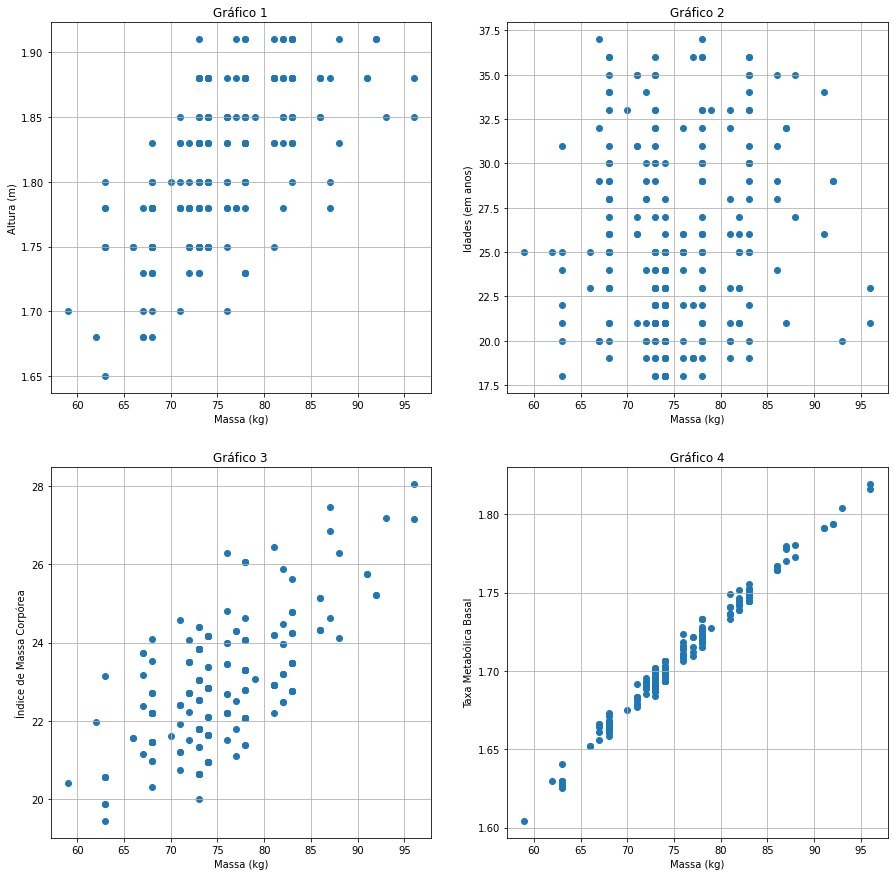

In [68]:
# Plotagem 
# Multiplos gráficos

figure, axis = plt.subplots(2,2, figsize=(15,15)) # definindo matriz de plotagem e figura de tamanho 15x15

x = np.array(sub_m)
y1 = np.array(sub_h)
y2 = np.array(sub_idade)
y3 = np.array(sub_imc)
y4 = np.array(sub_tmb)

# Plotagem dos 4 gráficos com fundo quadriculado (grid())
axis[0,0].scatter(x,y1)
axis[0,0].set_title("Gráfico 1")
axis[0,0].grid()
axis[0,0].set_xlabel("Massa (kg)")
axis[0,0].set_ylabel("Altura (m)")


axis[0,1].scatter(x,y2)
axis[0,1].set_title("Gráfico 2")
axis[0,1].grid()
axis[0,1].set_xlabel("Massa (kg)")
axis[0,1].set_ylabel("Idades (em anos)")


axis[1,0].scatter(x,y3)
axis[1,0].set_title("Gráfico 3")
axis[1,0].grid()
axis[1,0].set_xlabel("Massa (kg)")
axis[1,0].set_ylabel("Índice de Massa Corpórea")


axis[1,1].scatter(x,y4)
axis[1,1].set_title("Gráfico 4")
axis[1,1].grid()
axis[1,1].set_ylabel("Taxa Metabólica Basal")
axis[1,1].set_xlabel("Massa (kg)")

plt.subplots_adjust(wspace=0.2, hspace=0.2) # ajustando o espaçamento
plt.show()

Informe uma massa em kg (72.5): 45
O peso informado é de 45.0 kg e a taxa metabolica basal foi de 1.5564979884219752.
É necessário aumentar o peso em no mínimo 14.0 kg.


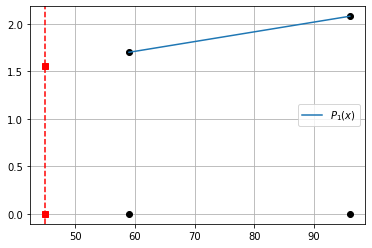

In [97]:
# Interpolação no gráfico Massa e TBM

x_linha = peso_max # em kg
y_linha = -0.1631 - 0.00255 * 35 + 0.4721 * np.log(x_linha) + 0.2952 * np.log(1.82) # taxa metabolica basal com valores fixos

# pontos
x0, y0 = peso_min, 1.7 
x1, y1 = x_linha, y_linha

a0 = y0
a1 = (y1-y0)/(x1-x0)

# Interpolação de Newton
P1 = lambda x: a0 + a1*(x-x0)

# ponto interpolado
xp = 100
xp = float(input("Informe uma massa em kg (72.5): "))
yp = P1(xp)

# plotagem
# nós
plt.plot([x0,x1],[0,0],'ok')

# valores nodais
plt.plot([x0,x1],[y0,y1],'ok')

# interpolador
x = np.linspace(x0,x1,30,endpoint=True)
plt.plot(x,P1(x),label='$P_1(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot(xp,yp,'sr')
plt.axvline(xp,0,yp,c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

print(f"O peso informado é de {xp} kg e a taxa metabolica basal foi de {P1(xp)}.")

# Verifica se o ponto pertence ou não a reta
if (P1(xp) < y0):
  aumentar_massa = x0 - xp
  print(f"É necessário aumentar o peso em no mínimo {aumentar_massa} kg.")
elif (P1(xp) > y1):
  diminuir_massa = xp - x1
  print(f"É necessário diminuir o peso em no mínimo {diminuir_massa} kg.")
else:
  print("Você está dentro dos padrões.")

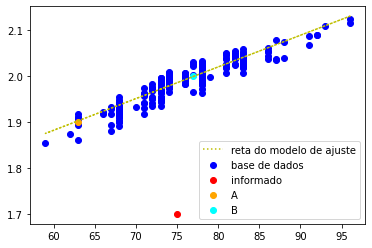

In [79]:
# Plotagem com Ajuste de Curvas
# Gráfico da relação entre massa e tmb
x = np.array(sub_m)

y = np.array(-0.1631 - 0.00255 * np.array(sub_idade) + 0.4721 * np.log(sub_m) + 0.2952 * np.log(sub_h))
m = len(sub_h)

alpha1 = (m*np.dot(x,y) - np.sum(x)*np.sum(y))/(m*np.dot(x,x)-np.sum(x)**2)
alpha0 = np.mean(y) - alpha1*np.mean(x)

y2 = alpha0 + alpha1*x # equação da reta do modelo de ajuste de curva


mod = plt.plot(x,y2,'y:'); # reta modelo
med = plt.scatter(x,y,c='b'); # base de dados

# Informando dados de uma pessoa qualquer e plotagem (scatter)
massa_informada = 75
tmb_informada = 1.7
red = plt.scatter(massa_informada, tmb_informada, c="red")

# Pontos conhecidos pertencentes a reta
xA = 63
yA = 1.90
pA = plt.scatter(xA,yA,c='orange')
xB = 77
yB = 2.00
pB = plt.scatter(xB, yB, c='cyan')

# Legenda
plt.legend({'reta do modelo de ajuste':mod, 'base de dados':med, "informado": red, "A":pA, "B":pB}); # legenda

# esta linha adiciona a equação de ajuste ao gráfico na posição (x,y) = (2.8,0.8)
# plt.annotate('y= {0:.2f} + {1:.2f}x'.format(alpha0,alpha1),(2.8,0.8),fontsize=14, c="#373737");

